# Suicide Around The World

According to [Wikipedia](https://en.wikipedia.org/wiki/Suicide), suicide is the act of intentionally causing one's own death. Suicide rates can be a good measure of the mental health in the society, since the act of suicide is highly related to mental disorders. The following report uses the data made available by [kaggle](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016?page=2) and aims to answer the following questions:

* The number of suicides is increasing over time?
* Is suicide related to the individual's sex?
* Is there a certain age where suicide is more susceptible?
* Do socioeconomical and geographical factors affects the suicide rates?

## Setting up the data

We start our analysis loading and getting some general information about the data.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import CategoricalDtype

df = pd.read_csv('data.csv')

df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Our dataset has 27820 rows and 12 columns. The dataset contains information about the total number of suicides (suicides_no) and the suicide rate over 100 thousand habitants (suicides/100k pop) grouped by country, year, sex, age and generation. The dataset also brings information about the gross domestic product (gdp_for_year) and gross domestic product per capita (gdp_per_capita), both in US dollars, grouped by year and country.

Some columns may have null data, as it has been seen in the HDI for year column. Let us check the dataset to see which column has null data.

In [10]:
columns = [i for i in df.columns]
nulls = [df[i].isna().sum() for i in df.columns ]

df_nulls = pd.DataFrame(data={'column':columns, 'nulls':nulls})

df_nulls

,column,nulls
0,country,0
1,year,0
2,sex,0
3,age,0
4,suicides_no,0
5,population,0
6,suicides/100k pop,0
7,country-year,0
8,HDI for year,19456
9,gdp_for_year ($),0


The HDI for year columns is the only one with null values and for that reason it will not be used in this report.

In [11]:
df.drop('HDI for year', axis=1, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In order to compare correctly the suicide rates over time, it is necessary to have the same countries in all years. Let us check it that is true.

In [24]:
countries = df['country'].nunique()
aux = True
for i in df['year'].unique():
    if(df[df['year'] == i]['country'].nunique() != countries):
        print('Year: ',i)
        print('Total of countries in the dataset: ', countries)
        print('Total of countries for the year: ',df[df['year'] == i]['country'].nunique(),'\n')
        aux = False

        
if aux:
    print('Countries are the same for every year')


Year:  1987
Total of countries in the dataset:  101
Total of countries for the year:  54 

Year:  1988
Total of countries in the dataset:  101
Total of countries for the year:  49 

Year:  1989
Total of countries in the dataset:  101
Total of countries for the year:  52 

Year:  1992
Total of countries in the dataset:  101
Total of countries for the year:  65 

Year:  1993
Total of countries in the dataset:  101
Total of countries for the year:  65 

Year:  1994
Total of countries in the dataset:  101
Total of countries for the year:  68 

Year:  1995
Total of countries in the dataset:  101
Total of countries for the year:  78 

Year:  1996
Total of countries in the dataset:  101
Total of countries for the year:  77 

Year:  1997
Total of countries in the dataset:  101
Total of countries for the year:  77 

Year:  1998
Total of countries in the dataset:  101
Total of countries for the year:  79 

Year:  1999
Total of countries in the dataset:  101
Total of countries for the year:  83 


Most of the years do not include date for the same countries. To make possible the comparison of suicide rates over time, we are going to be using only the countries which are included in all of the years. The year of 2016 will be ignored since there is only a few number of countries included in this year.

In [35]:
df = df[df['year'] != 2016]
countries = df['country'].unique()
years = df['year'].unique()
country_filter = []
for i in countries:
    aux = True
    for j in years:
        if not(i in df[df['year'] == j]['country'].unique()):
            aux = False
            break
    if aux:
        country_filter.append(i)
        
print('Number of chosen countries:',len(country_filter))

Number of chosen countries: 23


We now have 23 countries that can be compared over time. The countries are listed below.

In [44]:
df = df[df['country'].isin(country_filter)]
for i in country_filter:
    print(i)
    

Argentina
Austria
Belgium
Brazil
Chile
Colombia
Ecuador
Greece
Iceland
Israel
Italy
Japan
Luxembourg
Malta
Mauritius
Mexico
Netherlands
Puerto Rico
Republic of Korea
Singapore
Spain
United Kingdom
United States


## Suicide over time



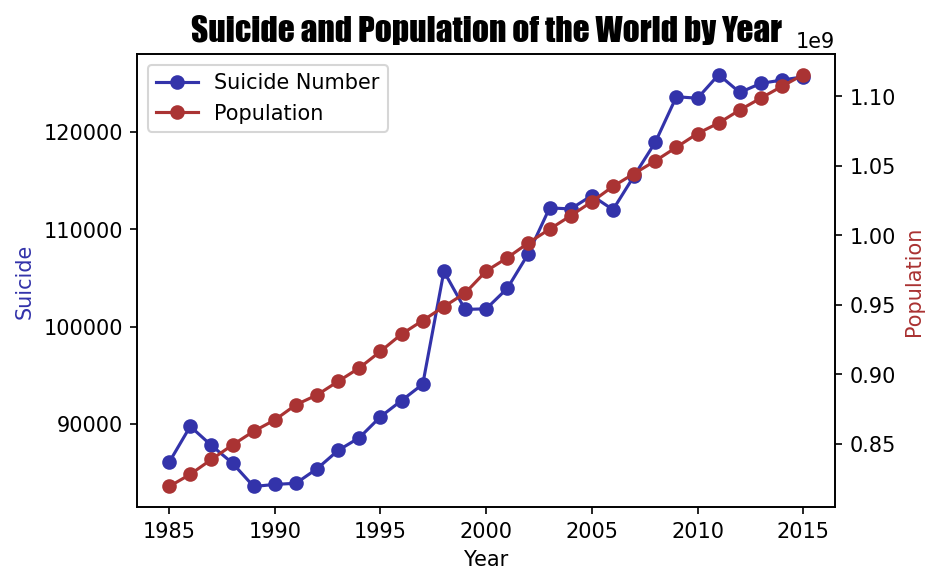

In [46]:
df_suicide_by_year = df[['year','suicides_no']].groupby('year').sum()
df_population_by_year = df[['year','population']].groupby('year').sum()

fig, ax = plt.subplots(figsize=(6,4), dpi=150)
ax.set_title('Suicide and Population of the World by Year', fontdict={'name':'fantasy','fontsize':16})

l1,=ax.plot(df_suicide_by_year.index, df_suicide_by_year['suicides_no'], label='Suicide Number', marker='o',color='#3333AA')
ax2 = ax.twinx()
l2,=ax2.plot(df_population_by_year.index, df_population_by_year['population'], label='Population', marker='o', color='#AA3333')
plt.legend([l1,l2],['Suicide Number','Population'])
ax.set_xlabel('Year')
ax.set_ylabel('Suicide', color='#3333AA')
ax2.set_ylabel('Suicide', color='#AA3333')
ax2.set_ylabel('Population')
plt.show()